<a href="https://colab.research.google.com/github/labudzki/MLforPA/blob/main/1_ML4PhA_2025_Exercise_sheet_1_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem set 1** - Machine Learning for Physics and Astronomy 2024/2025, UvA

- The total sheet gives 27 points
- Deadline for submitting your results is **Tue, 8/04/2025, 23:59**
- **IMPORTANT**: Specify if/how AI was used to solve the exercises by filling the corresponding "Usage of AI" comments. Anything between "No" (if applicable) and a short paragraph reflecting how AI was used is fine. Failing to do so faithfully will result in the substraction of points.

## Probability theory (7 points)


### 1.1 Monty Hall Problem (2 points)

*Topics: joined and marginal distributions, probability tables*

On a game show, a contestant is told the following rules:


> There are three doors, labelled 1, 2, 3. A single prize has been hidden behind one of them. You get to select one door. Initially your chosen door will not be opened. Instead, the gameshow host will open one of the other two doors, and *he will do so in such a way as not to reveal the prize.* For example, if you first choose door 1, he will then open one of doors 2 and 3, and it is guaranteed that he will choose which one to open so that the prize will not be revealed. At this point, you will be given a fresh choice of door: you can either stick with your first choice, or you can switch to the other closed door. All the doors will then be opened and you will receive whatever is behind your final choice of door.

Imagine that the contestant chooses door 1 first; then the gameshow host opens door 3, revealing nothing
behind the door, as promised. Should the contestant (a) stick with door 1, or (b) switch to door 2, or (c) does it make no difference? You may assume that initially, the prize is equally likely to be behind any of the 3 doors.

Use probability tables to justify your answer.

The contestant should switch to door 2 (b). When picking the first door, the contestant had a 1/3 probability of choosing the correct door. Once one door is revealed to have nothing it in, the contestant will have a 2/3 probability of getting the prize if they switch their response.





In [10]:
import pandas as pd

initial_choice = [1, 2, 3]
prize_door = [1, 2, 3]

data = []

# Generate all combinations
for choice in initial_choice:
    for prize in prize_door:
        if choice == prize:
          result1 = "Car"
          result2 = "No Car"
        else:
          result1 = "No Car"
          result2 = "Car"

        data.append([choice, prize, result1, result2])

df = pd.DataFrame(data, columns=["Initial Choice", "Prize Door", "Dont switch", "Switch"])

# Calculate total probabilities and add to table
total_cases = len(df)
noswitch_wins = df["Dont switch"].value_counts().get("Car", 0)
switch_wins = df["Switch"].value_counts().get("Car", 0)
noswitch_prob = noswitch_wins / total_cases
switch_prob = switch_wins / total_cases

probability_row = pd.DataFrame([[ "-", "-", f"{noswitch_prob:.2%}", f"{switch_prob:.2%}"]],
                               columns=df.columns)

df = pd.concat([df, probability_row], ignore_index=True)

df


,Initial Choice,Prize Door,Dont switch,Switch
0,1,1,Car,No Car
1,1,2,No Car,Car
2,1,3,No Car,Car
3,2,1,No Car,Car
4,2,2,Car,No Car
5,2,3,No Car,Car
6,3,1,No Car,Car
7,3,2,No Car,Car
8,3,3,Car,No Car
9,-,-,33.33%,66.67%


Usage of AI: *COMMENT HERE*

Some help with dataframe syntax because I'm not super familiar with it.

### 1.2 Extended Monty Hall Problem (2 points)

*Topics: joined and marginal distributions, probability tables*

Consider an extended version of the Monty Hall problem. There are now four doors, one with the prize behind it, one with a dog behind it and two with nothing behind them (in random order). The contestant can again randomly choose one door, after which Monty will open two of the other doors not revealing the prize. *Importantly*, if Monty has the choice to reveal the dog he will always do so.

Say the contestant chooses door 1, and Monty afterwards reveals an empty door and the dog and offers the contestant to switch doors. What is the probability to win the prize *if the contestant chooses to switch*?

Use probability tables to justify your answer.

If the contestant switches, they have a 3/4 probability of winning the prize.

In [57]:

# If the contestant chooses the dog door:
  # Monty will reveal two empty doors.
  # If they switch, they will win the car (since the last remaining door will have the car).
# If the contestant chooses the prize door:
  # Monty will reveal two empty doors (because he can't reveal the dog or the car).
  # If they switch, they will get the dog (since the last remaining door will have the dog).
# If the contestant chooses an empty door:
  # Monty will reveal the dog door and the other empty door.
  # If they switch, they will win the car (since the remaining door will have the car).

initial_choice = [1, 2, 3, 4]
prize_door = [1, 2, 3, 4]

data = []

# he always reveals a dog

# Generate all combinations
for choice in initial_choice:
    for dog in dog_door: #dog door cannot be choice door, has to be revealed
      for prize in prize_door:
        # print(choice, prize)
        # if choice == dog:
        #   revealed_door1 = revealed_door2 = "Dog"
        #   noswitch_result = "Empty"
        #   switch_result = "Car"
        if choice == prize:
          revealed_door1 = revealed_door2 = "Empty"
          noswitch_result = "Car"
          switch_result = "Dog"
        else:
          revealed_door1 = "Dog"
          revealed_door2 = "Empty"
          noswitch_result = "Empty"
          switch_result = "Car"

        data.append([choice, prize, revealed_door1, revealed_door2, noswitch_result, switch_result])

df = pd.DataFrame(data, columns=["Initial Choice", "Prize Door", "Revealed door 1", "Revealed door 2", "Dont switch", "Switch"])

# Calculate total probabilities and add to table
total_cases = len(df)
noswitch_wins = df["Dont switch"].value_counts().get("Car", 0)
switch_wins = df["Switch"].value_counts().get("Car", 0)
noswitch_prob = noswitch_wins / total_cases
switch_prob = switch_wins / total_cases

probability_row = pd.DataFrame([[ "-", "-", "-", "-", f"{noswitch_prob:.2%}", f"{switch_prob:.2%}"]],
                               columns=df.columns)

df = pd.concat([df, probability_row], ignore_index=True)

df

,Initial Choice,Prize Door,Revealed door 1,Revealed door 2,Dont switch,Switch
0,1,1,Empty,Empty,Car,Dog
1,1,2,Dog,Empty,Empty,Car
2,1,3,Dog,Empty,Empty,Car
3,1,4,Dog,Empty,Empty,Car
4,1,1,Empty,Empty,Car,Dog
...,...,...,...,...,...,...
60,4,1,Dog,Empty,Empty,Car
61,4,2,Dog,Empty,Empty,Car
62,4,3,Dog,Empty,Empty,Car
63,4,4,Empty,Empty,Car,Dog


Usage of AI: I used AI to help me understand the logic of the problem a bit, as seen in the comments at the top of the code.

### 1.3 Conditional Probabilities (3 points)

*Topics: frequentist probabilities, conditional probabilities*

Consider the probability table:

| X | Y | p(X,Y) |
|------|------| ----- |
| Hot (0)   | Sun (0) | 0.4 |
| Hot (0) | Rain (1) | 0.1 |
| Cold (1)  | Sun (0) | 0.2 |
| Cold (1)  | Rain (1) | 0.3 |



a. Implement a sampling algorithm that samples $(X, Y)$ pairs.

In [44]:
import random

def return_random_sample_joint():
    pairs = [(p[0], p[1]) for p in probability_table]
    my_weights = [p[2] for p in probability_table]
    return random.choices(pairs, weights=my_weights, k=1) #can change k value to obtain more samples

x = ['hot', 'cold']
y = ['sun', 'rain']

probability_table = [
  (x[0], y[0], 0.4), #hot sun
  (x[0], y[1], 0.1), #hot rain
  (x[1], y[0], 0.2), #cold sun
  (x[1], y[1], 0.3) #cold rain
]

sampled_pair = return_random_sample_joint()
print(sampled_pair)
print(sampled_pair[0])
print(sampled_pair[0][0])
# sampled_pairs_list = [return_random_sample_joint() for _ in range(10)]
# print(sampled_pairs_list)


[('cold', 'rain')]
('cold', 'rain')
cold


b. Generate samples from $p(Y| X = 0)$ by removing ("rejecting") some samples generated by your above sampling algorithm. Use these to generate a histogram for the conditional distribution $p(Y| X=0)$.

[[('hot', 'rain')], [('cold', 'rain')], [('hot', 'rain')], [('hot', 'rain')], [('hot', 'rain')], [('hot', 'sun')], [('cold', 'sun')], [('cold', 'rain')], [('hot', 'sun')], [('hot', 'sun')]]
[[('cold', 'rain')], [('cold', 'sun')], [('cold', 'rain')]]
1 2


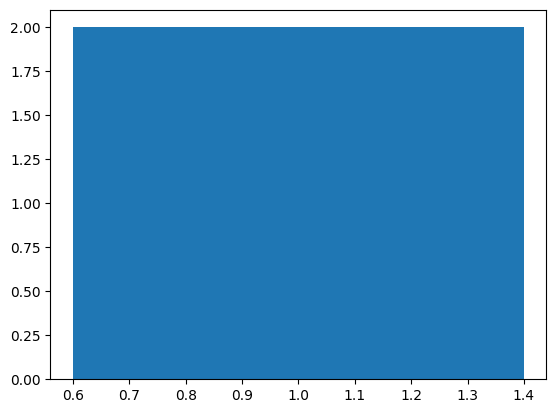

In [56]:
import matplotlib.pyplot as plt

# Put your solution here
sampled_pairs_rejected = [x for x in sampled_pairs_list if x[0][0] != 'hot']
print(sampled_pairs_list)
print(sampled_pairs_rejected)

#Check this answer by comparing to a calculation

count1 = 0
count2 = 0
for x in sampled_pairs_rejected:
  if x[0][1] == 'sun':
    count1+=1
  elif x[0][1] == 'rain':
    count2+=1
x = ['sun', 'rain']

print(count1, count2)
plt.bar(count1, count2)
plt.show()


c. Approximately how many samples do you need from the joint distribution to get stable (say, within 10%) results?

*Put your solution here*

d.  Calculate $p(Y|X=0)$ analytically. How does your sampling algorithm compare?

*Put your solution here*



Usage of AI:
I used AI to find out that random.choices exists and how to use it


## Distributions (5 points)

### 2.1 Convolution of two normal distributions (3 points)


*Topics: normal distributions, variance, mean, combining distributions, sums of random variables*

This exercise will demonstrate useful properties of normal distributions. A normal distribution $\mathcal{N}(x|\mu, \sigma)$ is completely defined by its mean $\mu$ and its standard deviation $\sigma$. As shown in the previous exercise, its PDF can be written as
$$ \mathcal{N}(x|\mu, \sigma) = \frac{1}{\sqrt{2 \pi}\sigma} \exp\left( \frac{-(x-\mu)^2}{2 \sigma^2} \right) \, .$$

#### a (1 point)
Create two datasets $\vec{x} = \{x_1, x_2, \dots, x_N\}$ and $\vec{y} = \{y_1, y_2, \dots, y_N\}$ by drawing randomly from the PDF of the normal distribution. For $\vec{x}$ draw from $\mathcal{N}(x|\mu=2, \sigma=1)$ and for $\vec{y}$ draw from $\mathcal{N}(y|\mu=4, \sigma=2)$. In order to have enough statistics, let $N = 10000$. Vizualize $\vec{x}$ and $\vec{y}$ in histograms with 32 bins from -2 to 14.

**Hint**: You can use `numpy.random.normal()` to draw $x$ values randomly from $\mathcal{N}(x|\mu, \sigma)$. Use `matplotlib.pyplot` to plot the datasets in a histogram.

In [ ]:
# Put your solution here

#### b (1 point)
Create a third dataset $\vec{z} = \{z_1, z_2, \dots, z_N\}$ where $z_i$ is the sum of two random numbers $x_i$ and $y_i$ that are drawn from $\mathcal{N}(x|\mu=2, \sigma=1)$ and $\mathcal{N}(y|\mu=4, \sigma=2)$, respectively. Plot the dataset. What do you observe? What does the distribution look like? How is its mean related to the two initial normal PDFs?

In [ ]:
# Put your solution here

#### c (1 point)
Calculate the variance of the third dataset. Do you find a relation to the variances of $\vec{x}$ and $\vec{y}$?

In [ ]:
# Put your solution here

### 2.2 Marginal normal distributions (2 points)

*Topics: multivariate normal & marginal distributions*

Consider a multivariate Gaussian of the form
$$P(\mathbf{x}) = \mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma}) = \frac{1}{(2\pi)^{D/2} |\mathbf{\Sigma}|^{1/2}} \exp\left(-\frac{1}{2} (\mathbf{x}-\boldsymbol{\mu})^{T} \mathbf{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\right) \, ,$$

where $\mathbf{x}$ and $\boldsymbol{\mu}$ are vectors with $D$ entries and $\mathbf{\Sigma}$ is a $D \times D$ covariance matrix. $|\mathbf{\Sigma}|$ is the determinant of this matrix.

#### a (1 point)
Consider the case where $D = 2$. We use the following three sets of ($\boldsymbol{\mu}$, $\mathbf{\Sigma}$) to create 2D contour- and 3D surface plots of the corresponding PDFs (with arbitrary contour levels)

$$ \boldsymbol{\mu_1} = \begin{pmatrix} 5 \\ 5 \end{pmatrix} ~ \mathbf{\Sigma_1} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \, ,$$

$$ \boldsymbol{\mu_2} = \begin{pmatrix} 5 \\ 5 \end{pmatrix} ~ \mathbf{\Sigma_2} = \begin{pmatrix} 1 & -0.5 \\ -0.5 & 1 \end{pmatrix} \, ,$$

$$ \boldsymbol{\mu_3} = \begin{pmatrix} 5 \\ 5 \end{pmatrix} ~ \mathbf{\Sigma_3} = \begin{pmatrix} 1 & 0.7 \\ 0.7 & 1 \end{pmatrix} \, .$$

Implement the multivariate Gaussian yourself using numpy matrix multiplication.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mvgauss(x, mu, sigma):
  raise NotImplementedError # Put your solution here

mu = np.array([5, 5])
sig1 = np.array([[1, 0.0], [0.0, 1]])
sig2 = np.array([[1, -0.5], [-0.5, 1]])
sig3 = np.array([[1, 0.7], [0.7, 1]])

def create_plots(mu, sig1, sig2, sig3):
    x = np.linspace(2, 8, 100)
    y = np.linspace(2, 8, 100)

    z1 = np.empty([len(x), len(y)])
    z2 = np.empty([len(x), len(y)])
    z3 = np.empty([len(x), len(y)])
    z = [z1,z2,z3]

    # collect plotting data
    for i in range(0, len(x)):
        for j in range(0, len(y)):
            z1[i][j] = mvgauss(np.array([x[i], y[j]]), mu, sig1)
            z2[i][j] = mvgauss(np.array([x[i], y[j]]), mu, sig2)
            z3[i][j] = mvgauss(np.array([x[i], y[j]]), mu, sig3)

    # contour plots
    fig, axs = plt.subplots(1,3, figsize=(15,5))
    for i, ax in enumerate(axs):
      ax.contour(x,y,z[i])
      ax.set_title(f'$\mu_{i+1}$, $\Sigma_{i+1}$')

    # surface plots
    xx,yy = np.meshgrid(x,y)
    fig2 = plt.figure(figsize=(15,5))
    for i in range(3):
      ax = fig2.add_subplot(1, 3, i+1, projection='3d')
      ax.plot_surface(xx,yy,z[i], cmap='viridis')

create_plots(mu,sig1,sig2,sig3)

#### b (1 point)
The marginal distribution of a multivariate Gaussian is defined as

$$ P(\mathbf{x}_i) = \int P(\mathbf{x}_i, \mathbf{x}_j) \, d\mathbf{x}_j \, .$$

Calculate the marginal distributions for the three multivariate Gaussians from above along the $x$ and $y$ axis. First do the calculation for one of the marginals by hand, and then use this to argue the answer for the other five marginals. Confirm your results using the `margins()` function from `scipy.stats.contingency`. How do the different marginal distributions compare?

*Put your solution here*

In [ ]:
from scipy.stats.contingency import margins
# Put your solution here

Usage of AI: *COMMENT HERE*

## Inference and Bayes nets (15 points)

### 3.1 Inverse Sampling (2 points)

*Topics: Inverse transform sampling*

**Reading material: Murphy 23.2.1**

(2 points) Consider the target exponential pdf $p(x)=\lambda e^{-\lambda x}$, where $\lambda$ is the rate parameter. Define a function that, using the inverse transform method, generates samples from the exponential distribution.

Choosing $\lambda =0.5$ and a sample size of $1000$, plot the histogram of the sampled data and overlay the theoretical exponential distribution curve on top.

Hint: You will need to use the function `np.random.uniform`

In [ ]:
def inverse_transform(rate, sample_size):
  # YOUR CODE HERE
  return


Usage of AI: *COMMENT HERE*

### 3.2 Metropolis Hastings (9 points)



*Topics: Multivariate normal, Metropolis Hastings and marginal distributionsm*

**Reading material: Murphy 5.2.2, 5.2.2.1, 24.3**

We will explore a 2-dim and bimodal probability density function.

In [ ]:
# provided

# The likelihood function is given

def pdf_bimodal(x):
    """Bimodal pdf"""
    sigma1 = 1.0
    sigma2 = 0.5
    pdf = 0.5/(np.sqrt(2*np.pi*sigma1**2))*np.exp(-0.5*((x-1.5)**2).sum()/sigma1**2)  +  0.5/(np.sqrt(2*np.pi*sigma2**2))*np.exp(-0.5*((x+1.0)**2).sum()/sigma2**2)
    return pdf


1. Write your own Metropolish Hastings algorithm. (4 points)

- The proposal distribution is supposed to be a $D=2$ dimensional isotropic Gaussian with variance $\sigma^2$.
- Given some pdf, the algorithm should produce and return a given number of chain points $N$, starting with some initial vector $\mathbf{x}_0$. The result should be returned as a $N\times D$ array.
- The algorithm should also evaluate and print the acceptance rate (fraction of accepted transitions over total number of steps).

Hints: Use `np.random.randn`, `np.random.rand`, `np.array` where appropriate. Write the algorithm such that it works for any dimensions of $\mathbf{x}_0$.

In [ ]:
def MetropolisHastings(pdf, N, x_init, sigma):
    # YOUR CODE HERE
    return

2. Explore the above bimodal distribution. (3 points)
- Show resulting chain for $N=10000$ and for five proposal widths in the range $\sigma \in [0.01, 100.]$.  
- Based on the acceptance rate and visual inspection of the result, argue what parameters work here best.
- What are the problems with too low or too high values of $\sigma$?
- Also discuss what happens when you start with initial values far away from the optimum. This initial phase is called "burn in phase".

Hints: use `plt.scatter`

In [ ]:
# YOUR CODE HERE

3. Compare your results with the true distribution using 1-dim histograms (both in $x_1$ and $x_2$ direction) (2 points)

- Discuss qualitatively whether the true distribution can be recovered for reasonable values of $\sigma$.
- Again, what happens if $\sigma$ is too large or too small?  Is what you see supporting your observations in the previous question?

Note: you have to write your own marginal distributions for `pdf_bimodal`, projected either on `x1` or on `x2` (do these two marginals differ in our case?).

Hints: use `plt.hist` with 100 bins and `density = True`

In [ ]:
# YOUR CODE HERE

Usage of AI: *COMMENT HERE*

### 3.3 Conditional independence and reparametrization (4 points)

*Topics: Independence and Conditional independence*

**Reading material: Murphy 10.1.2**

1. Reparametrization (2 points). In class we introduced the KL divergence
$$
D_{KL}(q \mid p) \equiv \int dx\; q(x) \ln\frac {q(x)}{p(x)}
$$
Show that it is reparametrization invariant, if we replace $x$ with another random variable $y = f(x)$, where $f(x)$ is strictly monotonic and differentiable.  Start by quoting $q(y)$ and $p(y)$ in terms of $q(x)$ and $p(x)$.  Hint: Use change of variables!

YOUR SOLUTION GOES HERE!

2. Conditional independence (2 points). Consider the graphical model defined by $p(x, y, z) = p(x \mid y) p(y \mid z) p(z)$. Show explicitly, by using the relevant definitions, that
- $x$ and $z$ are conditionally independent given $y$
- $z$ and $x$ are conditionally independent given $y$

YOUR SOLUTION GOES HERE!

Usage of AI: *COMMENT HERE*